# Семинар 13. Анализ временных рядов

Подключение библиотек. 
$
\newcommand{\R}{\mathbb{R}}
\newcommand{\X}{\mathbb{X}}
\newcommand{\norm}[1]{\lVert #1 \rVert}
\newcommand{\abs}[1]{\left| #1 \right|}
\newcommand{\E}{\mathbb{E}}
\newcommand{\D}{\mathbb{D}}
\renewcommand{\Prob}{\mathbb{P}}
\renewcommand{\le}{\leqslant}
\renewcommand{\ge}{\geqslant}
\newcommand{\eps}{\varepsilon}
\newcommand{\Normal}{\mathcal{N}}
\DeclareMathOperator{\TP}{TP}
\DeclareMathOperator{\FP}{FP}
\DeclareMathOperator{\TN}{TN}
\DeclareMathOperator{\FN}{FN}
\DeclareMathOperator{\Accuracy}{Accuracy}
\DeclareMathOperator{\Precision}{Precision}
\DeclareMathOperator{\Recall}{Recall}
\DeclareMathOperator{\Fscore}{F_1}
\DeclareMathOperator{\MSE}{MSE}
\DeclareMathOperator{\RMSE}{RMSE}
\DeclareMathOperator{\MAE}{MAE}
\DeclareMathOperator{\MAPE}{MAPE}
\DeclareMathOperator{\Rsqured}{R^2}
$

In [1]:
import statsmodels.api as sm
import statsmodels.tsa.api as tsa
import statsmodels.graphics.api as smg
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


plt.rcParams['figure.figsize'] = (13, 5)

In [2]:
from warnings import filterwarnings

filterwarnings('ignore')

# 1. Авторегрессия

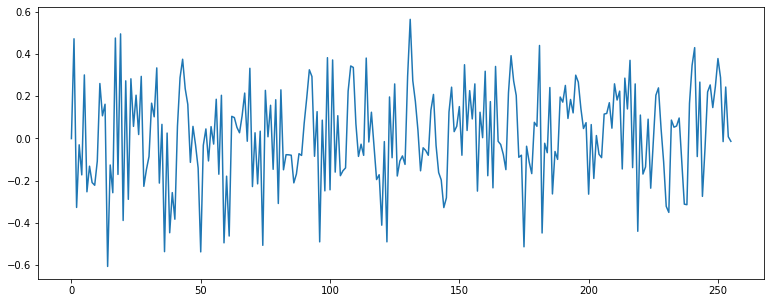

In [3]:
T = 256
warm = 10

theta = [-0.4, 0.3, 0.1]
trend = 0.0

p = len(theta)
sigma = 0.2

np.random.seed(1337)
series = np.random.normal(size=p)

for i in range(T + warm):
    x = (series[-p:] * theta).sum() + trend + np.random.normal(scale=sigma)
    series = np.append(series, [x])
    
series = pd.Series(series[-T:], index=range(T))
plt.plot(series)
plt.show()

In [4]:
p_value = tsa.adfuller(series)[1]
print('adfuller p-value:', p_value)

adfuller p-value: 1.0628523205971545e-18


In [5]:
arma = tsa.arima.ARIMA(series, order=(3, 0, 0))
arma_fit = arma.fit()
arma_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  256
Model:                 ARIMA(3, 0, 0)   Log Likelihood                  55.628
Date:                Wed, 31 Mar 2021   AIC                           -101.255
Time:                        19:58:49   BIC                            -83.529
Sample:                             0   HQIC                           -94.126
                                - 256                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0132      0.014      0.926      0.354      -0.015       0.041
ar.L1          0.1469      0.061      2.403      0.016       0.027       0.267
ar.L2          0.3630      0.059      6.108      0.000       0.247       0.479
ar.L3         -0.4029      0.057     -7.104      0.000      -0.514      -0.292
sigma2         0.0378      0.004     10.208      0.000       0.031       0.045
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 4.24
Prob(Q):                              0.97   Prob(JB):                         0.12
Heteroskedasticity (H):               0.93   Skew:                            -0.28
Prob(H) (two-sided):                  0.72   Kurtosis:                         2.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Optimal p: 3


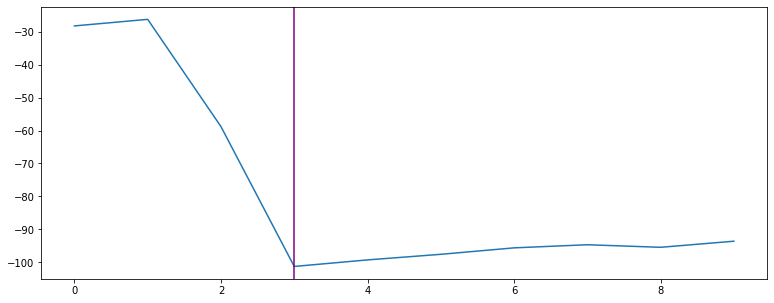

In [6]:
aic_list = []

for p in range(0, 10):
    fit_result = tsa.arima.ARIMA(series, order=(p, 0, 0)).fit()
    aic_list.append(fit_result.aic)
plt.plot(aic_list)

p_opt = np.argmin(aic_list)
print('Optimal p:', p_opt)
plt.axvline(p_opt, color='purple')
plt.show()

# 2. ARIMA

Посмотрим на набор данных Global Temperature Time Series.

In [7]:
df = pd.read_csv('https://datahub.io/core/global-temp/r/annual.csv')
df = df[df.Source == 'GISTEMP'].sort_values('Year').copy()
df.index = list(range(df.shape[0]))

df.head()

,Source,Year,Mean
0,GISTEMP,1880,-0.20
1,GISTEMP,1881,-0.12
2,GISTEMP,1882,-0.10
3,GISTEMP,1883,-0.21
4,GISTEMP,1884,-0.28


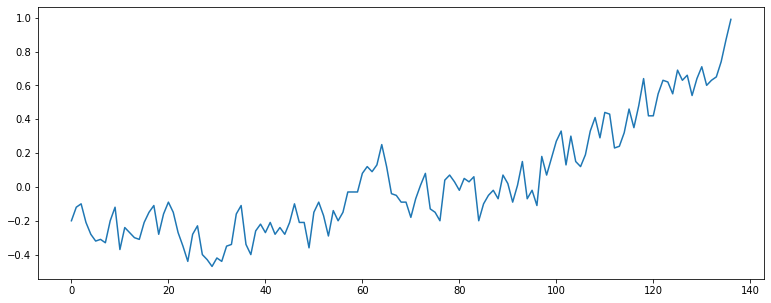

In [8]:
series = df.Mean
plt.plot(series); plt.show()

Приращения:

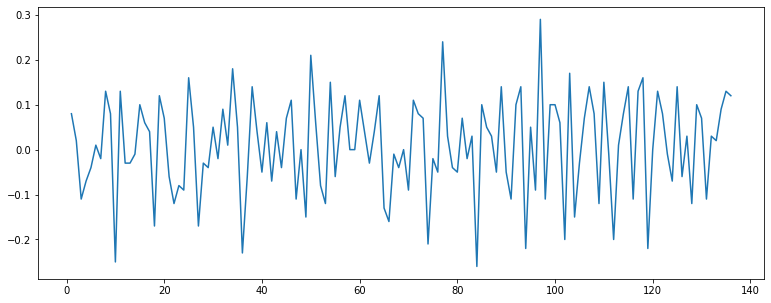

In [9]:
plt.plot(series.diff())

In [10]:
p_value = tsa.adfuller(series.diff().dropna())[1]
print('adfuller p-value:', p_value)

adfuller p-value: 1.3734950752142842e-09


Определяем порядок ARMA:

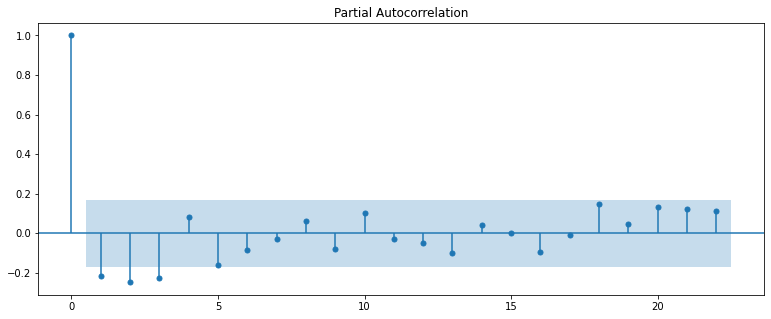

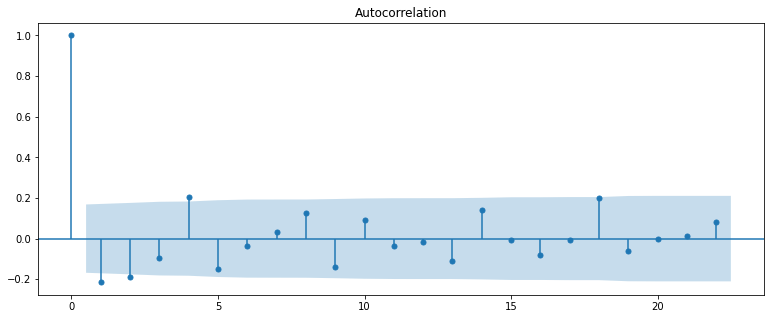

In [11]:
smg.tsa.plot_pacf(series.diff().dropna())
smg.tsa.plot_acf(series.diff().dropna())
plt.show()

In [12]:
p = 3
d = 1
q = 2

In [13]:
arima = tsa.arima.ARIMA(series, order=(p, d, q))
arima_fit = arima.fit()
arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   Mean   No. Observations:                  137
Model:                 ARIMA(3, 1, 2)   Log Likelihood                 121.169
Date:                Wed, 31 Mar 2021   AIC                           -230.338
Time:                        19:58:56   BIC                           -212.862
Sample:                             0   HQIC                          -223.236
                                - 137                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7874      0.238     -3.302      0.001      -1.255      -0.320
ar.L2         -0.1681      0.297     -0.566      0.571      -0.750       0.414
ar.L3         -0.2867      0.122     -2.355      0.019      -0.525      -0.048
ma.L1          0.4985      0.245      2.039      0.041       0.019       0.978
ma.L2         -0.2965      0.238     -1.244      0.214      -0.764       0.171
sigma2         0.0098      0.002      6.480      0.000       0.007       0.013
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 3.24
Prob(Q):                              0.84   Prob(JB):                         0.20
Heteroskedasticity (H):               1.55   Skew:                            -0.15
Prob(H) (two-sided):                  0.15   Kurtosis:                         2.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [14]:
from itertools import product
from tqdm.auto import tqdm

def find_opt_order(criterion='aic', **kwargs):
    order_opt = None
    crit_opt = 10000

    order_list = list(product(range(5), [1], range(5)))
    for order in tqdm(order_list):
        result = tsa.arima.ARIMA(series, order=order, **kwargs).fit()
        if not result.mle_retvals['converged']:
            print('Not converged:', order)
            continue
            
        crit_loc = getattr(result, criterion)
        if crit_loc < crit_opt:
            order_opt = order
            crit_opt = crit_loc
    print('Optimal order:', order_opt)
    return order_opt

Предсказание вперед:

In [15]:
order_opt = find_opt_order(criterion='aic')

arima = tsa.arima.ARIMA(series, order=order_opt)
arima_fit = arima.fit(transformed=False)
arima_fit.summary()

  0%|          | 0/25 [00:00<?, ?it/s]

Not converged: (3, 1, 3)
Not converged: (3, 1, 4)
Not converged: (4, 1, 2)
Not converged: (4, 1, 3)
Not converged: (4, 1, 4)
Optimal order: (3, 1, 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   Mean   No. Observations:                  137
Model:                 ARIMA(3, 1, 1)   Log Likelihood                 120.762
Date:                Wed, 31 Mar 2021   AIC                           -231.524
Time:                        19:59:04   BIC                           -216.961
Sample:                             0   HQIC                          -225.606
                                - 137                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9140      0.201     -4.555      0.000      -1.307      -0.521
ar.L2         -0.4567      0.109     -4.188      0.000      -0.670      -0.243
ar.L3         -0.3452      0.088     -3.926      0.000      -0.517      -0.173
ma.L1          0.6425      0.201      3.189      0.001       0.248       1.037
sigma2         0.0099      0.002      6.512      0.000       0.007       0.013
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):                 3.54
Prob(Q):                              0.74   Prob(JB):                         0.17
Heteroskedasticity (H):               1.52   Skew:                            -0.23
Prob(H) (two-sided):                  0.17   Kurtosis:                         2.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

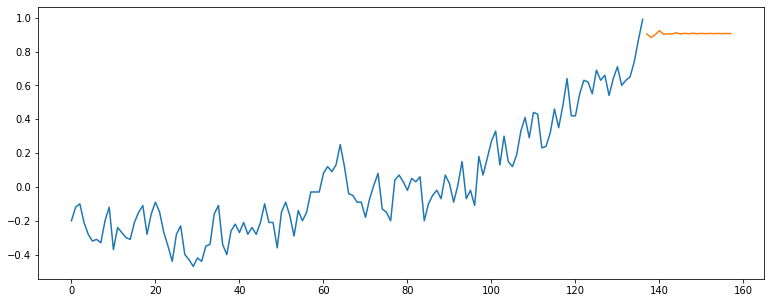

In [16]:
T = 20

series_prediction = arima_fit.predict(start=series.shape[0], end=series.shape[0] + T)

plt.plot(series, label='Train data')
plt.plot(series_prediction, label='Prediction')

Добавляем тренд:

In [17]:
trend = [0, 1, 1]


order_opt = find_opt_order(criterion='aic', trend=trend)


arima = tsa.arima.ARIMA(series, order=order_opt, trend=trend)
arima_fit = arima.fit(transformed=False)
arima_fit.summary()

  0%|          | 0/25 [00:00<?, ?it/s]

Not converged: (0, 1, 0)
Not converged: (0, 1, 1)
Not converged: (1, 1, 1)
Not converged: (2, 1, 4)
Not converged: (3, 1, 2)
Not converged: (3, 1, 3)
Not converged: (4, 1, 2)
Not converged: (4, 1, 4)
Optimal order: (0, 1, 3)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   Mean   No. Observations:                  137
Model:                 ARIMA(0, 1, 3)   Log Likelihood                 124.240
Date:                Wed, 31 Mar 2021   AIC                           -236.480
Time:                        19:59:16   BIC                           -219.004
Sample:                             0   HQIC                          -229.378
                                - 137                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0080      0.005     -1.475      0.140      -0.019       0.003
x2             0.0001   3.41e-05      3.066      0.002    3.77e-05       0.000
ma.L1         -0.3861      0.099     -3.903      0.000      -0.580      -0.192
ma.L2         -0.2490      0.104     -2.393      0.017      -0.453      -0.045
ma.L3         -0.1057      0.089     -1.193      0.233      -0.279       0.068
sigma2         0.0099      0.002      6.111      0.000       0.007       0.013
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 3.48
Prob(Q):                              0.85   Prob(JB):                         0.18
Heteroskedasticity (H):               1.38   Skew:                            -0.19
Prob(H) (two-sided):                  0.28   Kurtosis:                         2.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

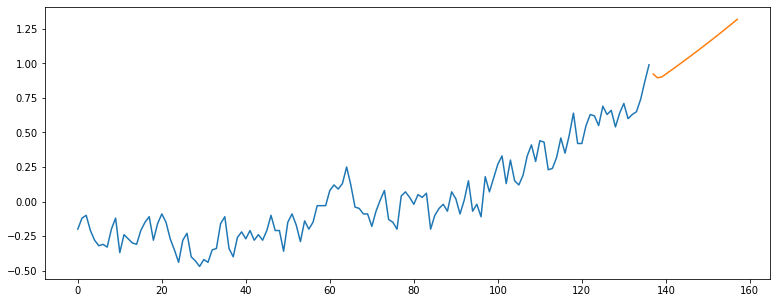

In [18]:
T = 20

series_prediction = arima_fit.predict(start=series.shape[0], end=series.shape[0] + T)

plt.plot(series, label='Train data')
plt.plot(series_prediction, label='Prediction')

# 3. SARIMA

In [19]:
df = pd.read_csv('https://datahub.io/core/global-temp/r/monthly.csv')
df = df[df.Source == 'GISTEMP'].sort_values('Date').copy()
df.index = list(range(df.shape[0]))

df.head()

,Source,Date,Mean
0,GISTEMP,1880-01-06,-0.30
1,GISTEMP,1880-02-06,-0.21
2,GISTEMP,1880-03-06,-0.18
3,GISTEMP,1880-04-06,-0.27
4,GISTEMP,1880-05-06,-0.14


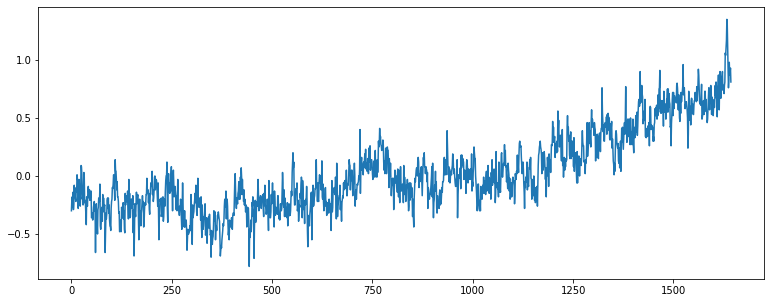

In [20]:
series = df.Mean
plt.plot(series)

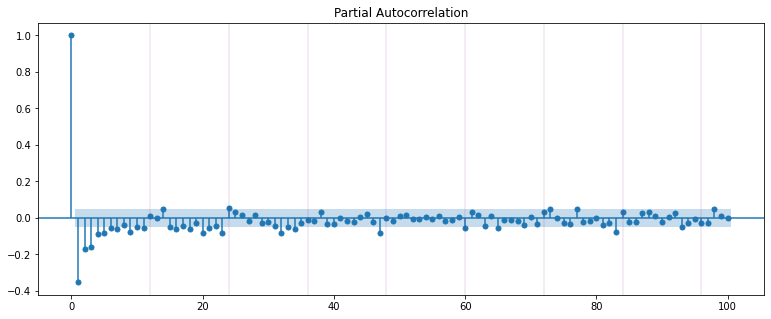

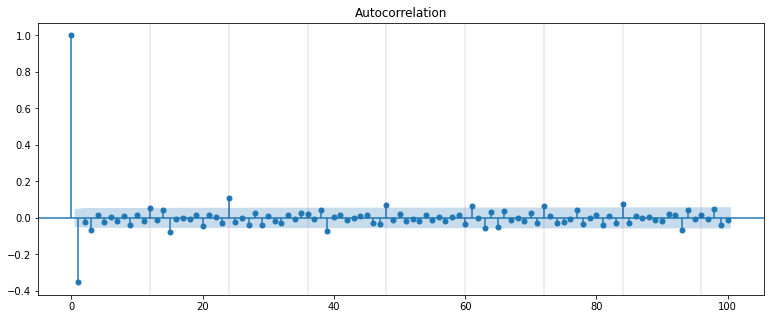

In [21]:
lags = 100

fig = smg.tsa.plot_pacf(series.diff().dropna(), lags=lags)
ax = fig.gca()
for lag in range(12, lags, 12):
    ax.axvline(lag, color='purple', alpha=0.1)

    
fig = smg.tsa.plot_acf(series.diff().dropna(), lags=lags)
ax = fig.gca()
for lag in range(12, lags, 12):
    ax.axvline(lag, color='purple', alpha=0.1)
plt.show()

In [22]:
sarima = tsa.SARIMAX(series, order=(1, 1, 1), seasonal_order=(2, 1, 0, 12))
sarima_fit = sarima.fit(n_jobs=-1)
sarima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                Mean   No. Observations:                 1644
Model:             SARIMAX(1, 1, 1)x(2, 1, [], 12)   Log Likelihood                1103.338
Date:                             Wed, 31 Mar 2021   AIC                          -2196.676
Time:                                     19:59:24   BIC                          -2169.692
Sample:                                          0   HQIC                         -2186.666
                                            - 1644                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1757      0.040      4.405      0.000       0.098       0.254
ma.L1         -0.6771      0.031    -21.549      0.000      -0.739      -0.615
ar.S.L12      -0.7048      0.021    -33.996      0.000      -0.745      -0.664
ar.S.L24      -0.2994      0.022    -13.912      0.000      -0.342      -0.257
sigma2         0.0151      0.000     32.288      0.000       0.014       0.016
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                24.61
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               1.01   Skew:                            -0.11
Prob(H) (two-sided):                  0.92   Kurtosis:                         3.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [23]:
def find_opt_order(criterion='aic', **kwargs):
    order_opt = None
    seasonal_order_opt = None
    crit_opt = 10000

    order_list = list(product(range(1, 4), [1], range(3)))
    seasonal_order_list = list(product(range(2), [1], range(3), [12]))
    params_list = list(product(order_list, seasonal_order_list))
    
    for order, seasonal_order in tqdm(params_list):
        result = tsa.SARIMAX(series, order=order, seasonal_order=seasonal_order, **kwargs).fit()
        if not result.mle_retvals['converged']:
            print('Not converged:', order, seasonal_order)
            continue
            
        crit_loc = getattr(result, criterion)
        if crit_loc < crit_opt:
            order_opt = order
            seasonal_order_opt = seasonal_order
            crit_opt = crit_loc
    print('Optimal order:', order_opt)
    print('Optimal seasonal order:', seasonal_order_opt)
    return order_opt, seasonal_order_opt

In [24]:
order_opt, seasonal_order_opt = find_opt_order()

  0%|          | 0/54 [00:00<?, ?it/s]

Not converged: (1, 1, 1)
Not converged: (1, 1, 2)
Not converged: (1, 1, 2)
Not converged: (1, 1, 2)
Not converged: (1, 1, 2)
Not converged: (2, 1, 0)
Not converged: (2, 1, 1)
Not converged: (2, 1, 2)
Not converged: (2, 1, 2)
Not converged: (2, 1, 2)
Not converged: (3, 1, 0)
Not converged: (3, 1, 1)
Not converged: (3, 1, 1)
Not converged: (3, 1, 1)
Not converged: (3, 1, 1)
Not converged: (3, 1, 2)
Not converged: (3, 1, 2)
Not converged: (3, 1, 2)
Not converged: (3, 1, 2)
Not converged: (3, 1, 2)
Optimal order: (3, 1, 1)
Optimal seasonal order: (0, 1, 1, 12)


In [25]:
order_opt = (3, 1, 1)
seasonal_order_opt = (0, 1, 1, 12)

Order_opt: (3, 1, 1)
Seasonal order opt: (0, 1, 1, 12)


In [27]:
sarima = tsa.SARIMAX(series, order=order_opt, seasonal_order=seasonal_order_opt)
sarima_fit = sarima.fit()
sarima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                               Mean   No. Observations:                 1644
Model:             SARIMAX(3, 1, 1)x(0, 1, 1, 12)   Log Likelihood                1289.634
Date:                            Wed, 31 Mar 2021   AIC                          -2567.268
Time:                                    20:11:22   BIC                          -2534.887
Sample:                                         0   HQIC                         -2555.255
                                           - 1644                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4609      0.023     19.696      0.000       0.415       0.507
ar.L2          0.1758      0.027      6.483      0.000       0.123       0.229
ar.L3          0.0863      0.026      3.372      0.001       0.036       0.136
ma.L1         -0.9744      0.008   -119.361      0.000      -0.990      -0.958
ma.S.L12      -0.9532      0.008   -123.003      0.000      -0.968      -0.938
sigma2         0.0118      0.000     33.392      0.000       0.011       0.012
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                38.78
Prob(Q):                              0.75   Prob(JB):                         0.00
Heteroskedasticity (H):               1.00   Skew:                             0.01
Prob(H) (two-sided):                  0.97   Kurtosis:                         3.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

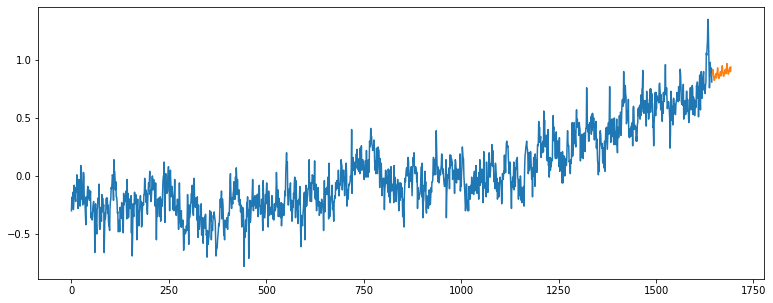

In [31]:
T = 48

series_prediction = sarima_fit.predict(start=series.shape[0], end=series.shape[0] + T)

plt.plot(series, label='Train data')
plt.plot(series_prediction, label='Prediction')
plt.show()

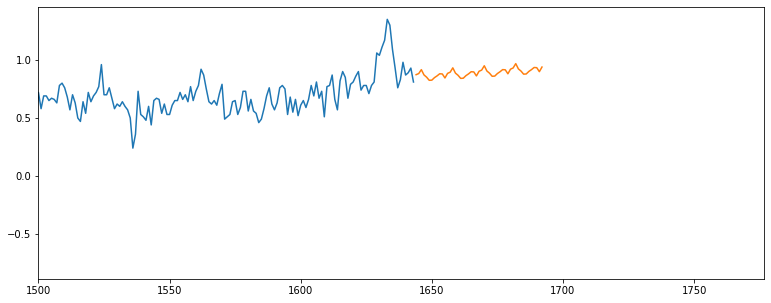

In [32]:
plt.plot(series, label='Train data')
plt.plot(series_prediction, label='Prediction')
plt.xlim(1500)
plt.show()